In [3]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from scipy.stats import spearmanr

In [4]:
if not os.path.exists("Data"):
    os.mkdir("Data")
if not os.path.exists("Figures"):
    os.mkdir("Figures")

In [5]:
datasets = [
    "contact-primary-school",
    "contact-high-school",
    "hospital-lyon",
    "email-enron",
    "email-eu",
    "diseasome",
    "disgenenet",
    "ndc-substances",
    "congress-bills",
    "tags-ask-ubuntu",
]

min_size = 2

In [6]:
with open(f"Data/empirical_simpliciality.json", "r") as file:
    data = json.loads(file.read())

In [7]:
print("Simplicial Fraction")
print("\n".join([str(d) + ": " + str(round(data[d]["sf"], 4)) for d in datasets]))

print("\nEdit Simpliciality")
print("\n".join([str(d) + ": " + str(round(data[d]["es"], 4)) for d in datasets]))

print("\nFace Edit Simpliciality")
print("\n".join([str(d) + ": " + str(round(data[d]["fes"], 4)) for d in datasets]))

Simplicial Fraction
contact-primary-school: 0.8471
contact-high-school: 0.8065
hospital-lyon: 0.9121
email-enron: 0.3128
email-eu: 0.3171
diseasome: 0.0
disgenenet: 0.0
ndc-substances: 0.0201
congress-bills: 0.0291
tags-ask-ubuntu: 0.1515

Edit Simpliciality
contact-primary-school: 0.9175
contact-high-school: 0.9271
hospital-lyon: 0.9545
email-enron: 0.0522
email-eu: 0.0492
diseasome: 0.0454
disgenenet: 0.0048
ndc-substances: 0.0053
congress-bills: 0.0058
tags-ask-ubuntu: 0.2487

Face Edit Simpliciality
contact-primary-school: 0.9373
contact-high-school: 0.923
hospital-lyon: 0.9719
email-enron: 0.4982
email-eu: 0.5217
diseasome: 0.0407
disgenenet: 0.0079
ndc-substances: 0.0705
congress-bills: 0.1006
tags-ask-ubuntu: 0.4577


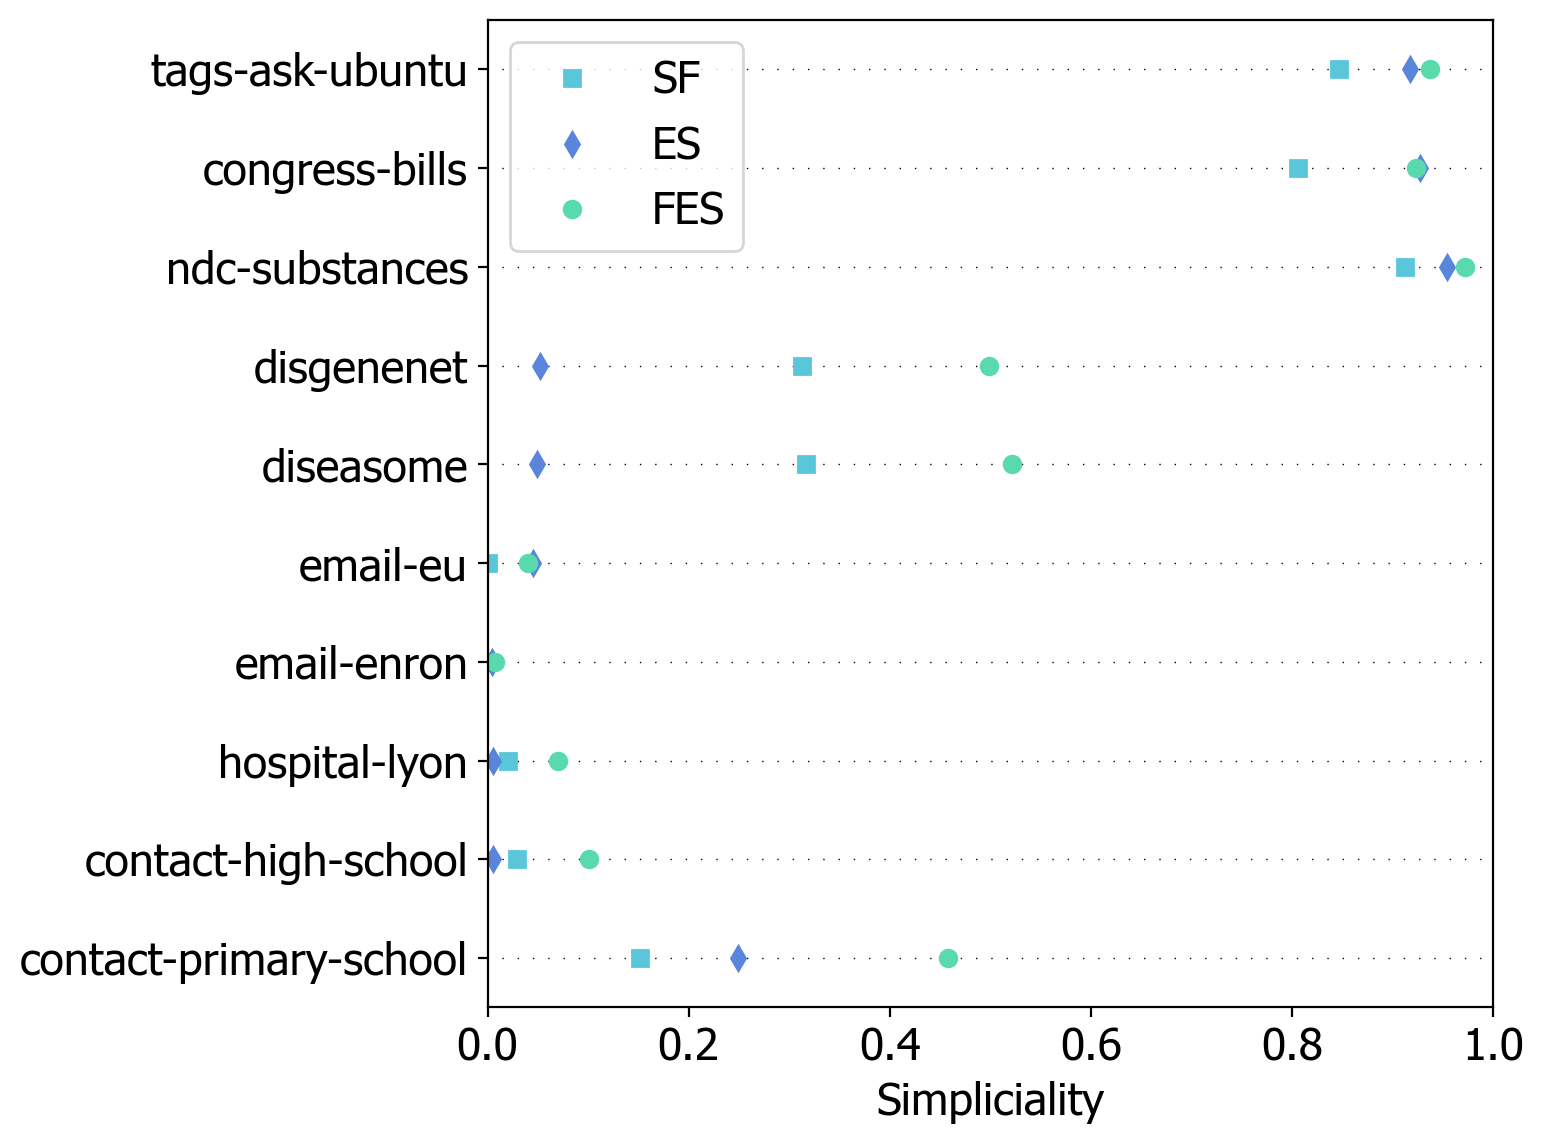

In [8]:
# plot
plt.figure(figsize=(8, 6), dpi=200)
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Tahoma", "DejaVu Sans", "Lucida Grande", "Verdana"]
rcParams["font.size"] = 16

color_palette = ["#59C6DA", "#5986DA", "#59DAAD"]

datasets_rev = datasets[::-1]
sf = [data[d]["sf"] for d in datasets_rev]
es = [data[d]["es"] for d in datasets_rev]
fes = [data[d]["fes"] for d in datasets_rev]

for i in range(len(datasets)):
    plt.plot([0, 1], [i, i], linestyle=(1, (1, 10)), linewidth=0.5, color="black")

plt.plot(sf, datasets, marker="s", linestyle="", color=color_palette[0], label="SF")
plt.plot(es, datasets, marker="d", linestyle="", color=color_palette[1], label="ES")
plt.plot(fes, datasets, marker="o", linestyle="", color=color_palette[2], label="FES")

plt.xlabel("Simpliciality")
plt.xlim([-0.0, 1.0])
plt.ylim([-0.5, len(datasets) - 0.5])
plt.legend()
plt.tight_layout()

plt.savefig("Figures/FigX/empirical_simpliciality.png", dpi=1000)
plt.savefig("Figures/FigX/empirical_simpliciality.pdf", dpi=1000)
plt.show()